In [1]:
import time
import pandas as pd
import re
import datetime

In [2]:
# load the csv file into a pandas dataframe
df = pd.read_csv("discord_channel_messages.csv")
df

,author,content,timestamp
0,KILLFEED,"Kaidan got killed by MrFahrenheit (KA-M, 51.53m)",2025-04-01T20:00:20.521Z
1,Unknown,"Patmus got killed by MrFahrenheit (KA-M, 7.75m)",2025-04-01T20:01:43.153Z
2,KILLFEED,"Friend got killed by LaC0 (Mlock-91, 1.12m)",2025-04-01T20:26:19.227Z
3,KILLFEED,"Apian got killed by [BuZz] John Pork (DMR, 3.07m)",2025-04-01T20:52:08.817Z
4,KILLFEED,Anthony Caponi got killed by JasonBjoern (KA-1...,2025-04-01T21:31:22.235Z
...,...,...,...
2395,Unknown,"Cateye got killed by Silent (Blaze, 240.43m)",2024-12-18T20:34:30.064Z
2396,KILLFEED,"Boris got killed by TEEG (VSD, 96.52m)",2024-12-18T20:39:54.556Z
2397,Unknown,"Survivor (4) got killed by TEEG (Vikhr, 5.53m)",2024-12-18T20:46:13.773Z
2398,Unknown,"SUTRIONS got killed by TEEG (VSD, 17.35m)",2024-12-18T20:46:43.945Z


In [3]:
# load the csv file into a pandas dataframe
df = pd.read_csv("discord_channel_messages.csv")

# drop author column
df.drop(columns=['author'], inplace=True)

# Split column content
# Victim: before the first " got killed by "
# Killer: between " got killed by " and " "
# Meter: after ", " and before "m)"

df['Victim'] = df['content'].str.extract(r'^(.*?) got killed by ')

# if Victim contains "Survivor (<any number>)" set the String to "User"
df['Victim'] = df['Victim'].str.replace(r'Survivor \(\d+\)', 'User', regex=True)


# tmp: everything after 'got killed by '
df['tmp2'] = df['content'].str.split('got killed by ').str[1]


df['Meter'] = df['content'].str.extract(r', (.*?)m\)')

# TMP: reverse the order of the characters in colmn content
df['tmp'] = df['content'].str[::-1]
# keep everything after the first " ," 
df['tmp'] = df['tmp'].str.split(' ,').str[1]
# remove everything behind the first "( " with regex
df['tmp'] = df['tmp'].str.replace(r'\(.*', '', regex=True)
# reverse the order of the characters in column tmp again
df['Weapon'] = df['tmp']
# split the column tmp2 by " (". Sometimes there are two " (" in the column in this case we combine [0] and [1]
df['Killer'] = df['tmp2'].str.split(' \(').str[0]


# drop the column content
df.drop(columns=['content'], inplace=True)

# create column date and column time from the column timestamp
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.time
# drop the column timestamp
df.drop(columns=['timestamp'], inplace=True)

df['date'] = pd.to_datetime(df['date'])

# remove everything behind . of colum time
df['time'] = df['time'].astype(str).str.split('.').str[0]

#df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.date

# drop duplicate rows
df.drop_duplicates(inplace=True)

#  cast m to number
df['Meter'] = df['Meter'].str.replace('m', '').astype(float)

df

,Victim,tmp2,Meter,tmp,Weapon,Killer,date,time
0,Kaidan,"MrFahrenheit (KA-M, 51.53m)",51.53,M-AK,M-AK,MrFahrenheit,2025-04-01,20:00:20
1,Patmus,"MrFahrenheit (KA-M, 7.75m)",7.75,M-AK,M-AK,MrFahrenheit,2025-04-01,20:01:43
2,Friend,"LaC0 (Mlock-91, 1.12m)",1.12,19-kcolM,19-kcolM,LaC0,2025-04-01,20:26:19
3,Apian,"[BuZz] John Pork (DMR, 3.07m)",3.07,RMD,RMD,[BuZz] John Pork,2025-04-01,20:52:08
4,Anthony Caponi,"JasonBjoern (KA-101, 31.45m)",31.45,101-AK,101-AK,JasonBjoern,2025-04-01,21:31:22
...,...,...,...,...,...,...,...,...
2395,Cateye,"Silent (Blaze, 240.43m)",240.43,ezalB,ezalB,Silent,2024-12-18,20:34:30
2396,Boris,"TEEG (VSD, 96.52m)",96.52,DSV,DSV,TEEG,2024-12-18,20:39:54
2397,User,"TEEG (Vikhr, 5.53m)",5.53,rhkiV,rhkiV,TEEG,2024-12-18,20:46:13
2398,SUTRIONS,"TEEG (VSD, 17.35m)",17.35,DSV,DSV,TEEG,2024-12-18,20:46:43


In [4]:
# visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)


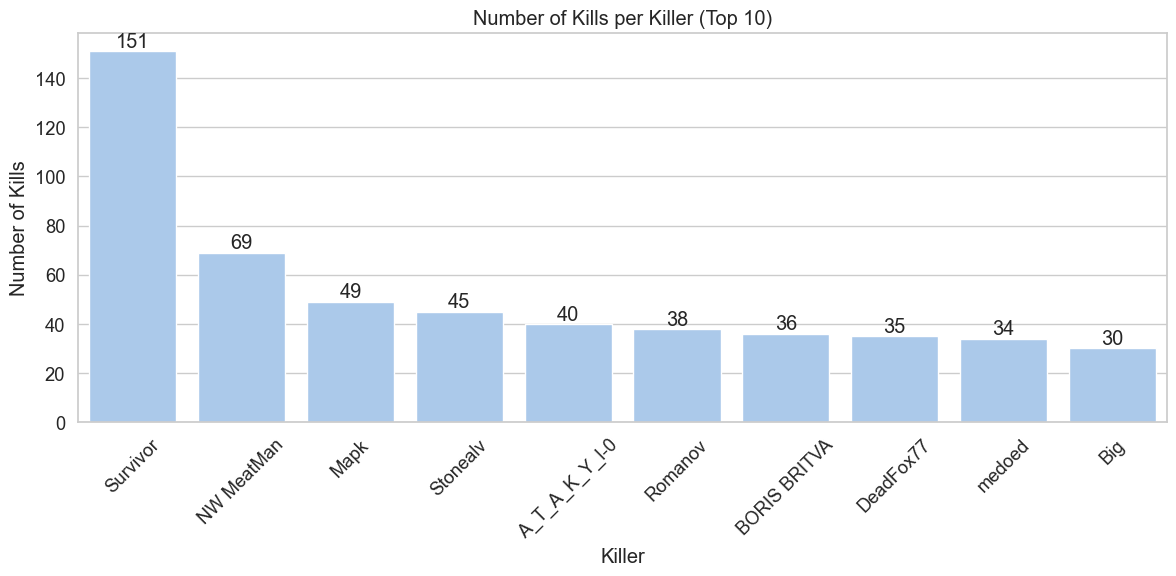

In [5]:
# Create a count plot of the number of kills per killer (top 10)
plt.figure(figsize=(12, 6))
top_10_killers = df['Killer'].value_counts().head(10).index
sns.countplot(data=df[df['Killer'].isin(top_10_killers)], x='Killer', order=top_10_killers)
plt.title('Number of Kills per Killer (Top 10)')
plt.xlabel('Killer')
plt.ylabel('Number of Kills')
plt.xticks(rotation=45)

# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()


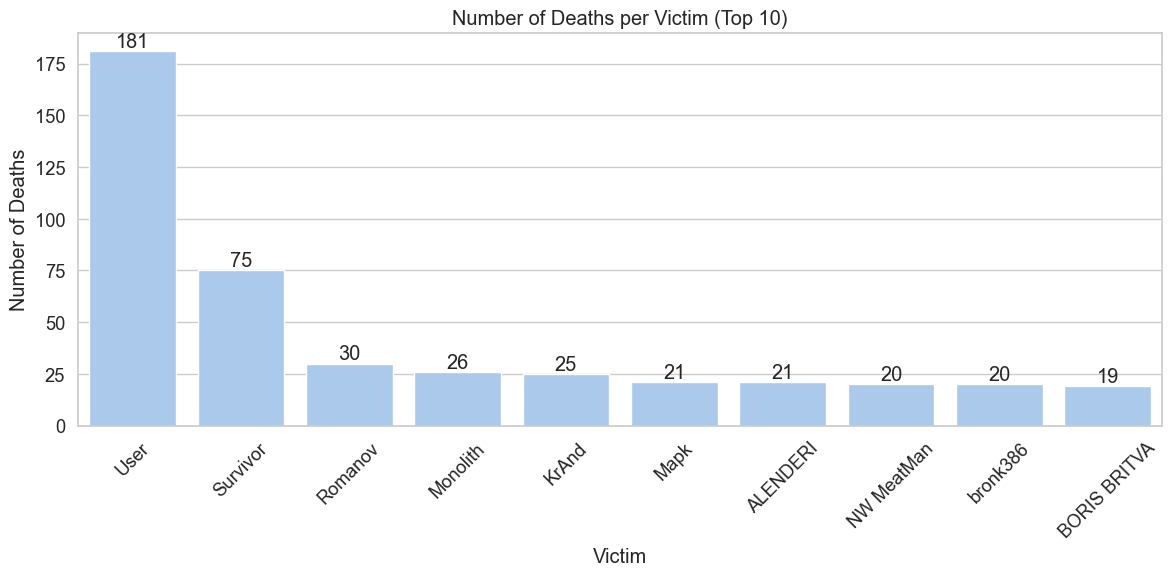

In [6]:
# Create a count plot of the number of kills per victim (top 10)
plt.figure(figsize=(12, 6))
top_10_victims = df['Victim'].value_counts().head(10).index
sns.countplot(data=df[df['Victim'].isin(top_10_victims)], x='Victim', order=top_10_victims)
plt.title('Number of Deaths per Victim (Top 10)')
plt.xlabel('Victim')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)

# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

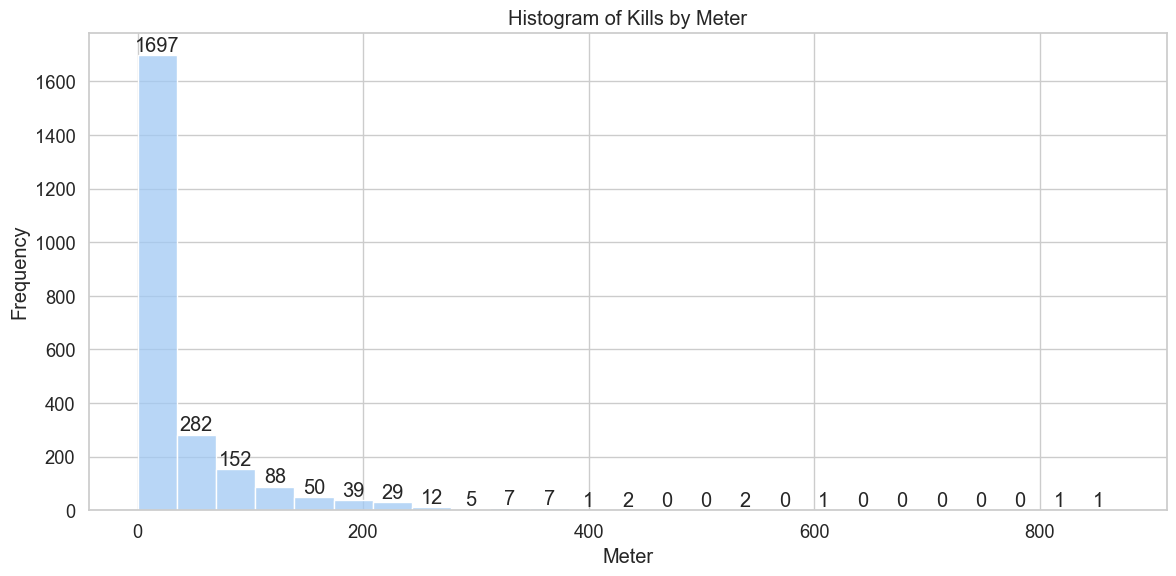

In [7]:
# Create a histogram for the Meter column with automatic bins
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='Meter', bins=25, kde=False)
plt.title('Histogram of Kills by Meter')
plt.xlabel('Meter')
plt.ylabel('Frequency')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()


In [8]:
# table of the top 10 kills by meter
top_10_kills_by_meter = df.nlargest(10, 'Meter')
top_10_kills_by_meter.reset_index(drop=True, inplace=True)
top_10_kills_by_meter


,Victim,tmp2,Meter,tmp,Weapon,Killer,date,time
0,Reinhart Beinhart,"Darkness (DMR, 868.96m)",868.96,RMD,RMD,Darkness,2025-03-24,18:38:25
1,Mr.Freeman,"[BuZz] John Pork (DMR, 812.79m)",812.79,RMD,RMD,[BuZz] John Pork,2025-04-04,18:57:39
2,pork,"chste043 (M70 Tundra, 604.89m)",604.89,ardnuT 07M,ardnuT 07M,chste043,2025-02-22,17:24:00
3,Rabbit,"NW MeatMan (VSD, 538.78m)",538.78,DSV,DSV,NW MeatMan,2025-01-07,19:40:33
4,Flow_EZGG,"NW MeatMan (VSD, 528.79m)",528.79,DSV,DSV,NW MeatMan,2025-01-07,19:34:48
5,Dahmer,"Tom (CR-550 Savanna, 442.75m)",442.75,annavaS 055-RC,annavaS 055-RC,Tom,2025-01-20,01:02:56
6,PoTiS,"PussyDestroyer (VS-89, 436.79m)",436.79,98-SV,98-SV,PussyDestroyer,2025-03-05,00:06:53
7,CrayonEater,"A_T_A_K_Y_l-0 (Blaze, 398.15m)",398.15,ezalB,ezalB,A_T_A_K_Y_l-0,2025-03-03,20:07:58
8,[SMRF]Banderivets,"Blind Boris (VSD, 381.1m)",381.10,DSV,DSV,Blind Boris,2025-01-11,21:02:13
9,Zherion,"-Dragon- (M70 Tundra, 372.49m)",372.49,ardnuT 07M,ardnuT 07M,-Dragon-,2024-12-31,12:50:06


In [9]:
# Average kill distance per Weapon
average_kill_distance = df.groupby('Weapon')['Meter'].mean().reset_index()
average_kill_distance.rename(columns={'tmp': 'Weapon', 'Meter': 'Average Distance (m)'}, inplace=True)
average_kill_distance.sort_values(by='Average Distance (m)', ascending=False, inplace=True,)
average_kill_distance['Average Distance (m)'] = average_kill_distance['Average Distance (m)'].round(2)
average_kill_distance.reset_index(drop=True, inplace=True)


# add max kill distance to the table
max_kill_distance = df.groupby('Weapon')['Meter'].max().reset_index()
max_kill_distance.rename(columns={'tmp': 'Weapon', 'Meter': 'Max Distance (m)'}, inplace=True)
max_kill_distance.sort_values(by='Max Distance (m)', ascending=False, inplace=True)
max_kill_distance.reset_index(drop=True, inplace=True)
# merge the two tables
average_kill_distance = pd.merge(average_kill_distance, max_kill_distance, on='Weapon')

average_kill_distance.head(10)

,Weapon,Average Distance (m),Max Distance (m)
0,annavaS 055-RC,131.23,442.75
1,ardnuT 07M,115.01,604.89
2,98-SV,104.81,436.79
3,RMD,86.13,868.96
4,DSV,83.98,538.78
5,ezalB,80.75,398.15
6,03/19 nisoM,66.06,253.16
7,reenoiP,60.39,176.86
8,725-RC,46.75,222.67
9,RAL,45.53,236.36


In [10]:
# all kills with weapon "Potato"
potato_kills = df[df['Weapon'] == 'Potato']
potato_kills

,Victim,tmp2,Meter,tmp,Weapon,Killer,date,time


In [11]:
# Top weapons by kill count with average distance
top_weapons_by_kill_count = df['tmp'].value_counts().reset_index()
top_weapons_by_kill_count.columns = ['Weapon', 'Kill Count']
top_weapons_by_kill_count.reset_index(drop=True, inplace=True)

# Merge with average kill distance
top_weapons_with_avg_distance = top_weapons_by_kill_count.merge(
    average_kill_distance, on='Weapon', how='left'
)

# Sort by kill count and display the top 10
top_weapons_with_avg_distance.sort_values(by='Kill Count', ascending=False, inplace=True)
top_weapons_with_avg_distance.head(10)


,Weapon,Kill Count,Average Distance (m),Max Distance (m)
0,47-AK,241,13.32,169.67
1,1A-4M,158,28.52,369.33
2,ardnuT 07M,146,115.01,604.89
3,M-AK,136,13.86,78.98
4,RMD,122,86.13,868.96
5,ezalB,103,80.75,398.15
6,DSV,96,83.98,538.78
7,RAL,89,45.53,236.36
8,101-AK,81,14.86,97.29
9,98-SV,75,104.81,436.79


C:\Users\Fabian\AppData\Local\Temp\ipykernel_12392\1523979203.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time'].astype(str)).dt.hour
C:\Users\Fabian\AppData\Local\Temp\ipykernel_12392\1523979203.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour', palette='viridis')


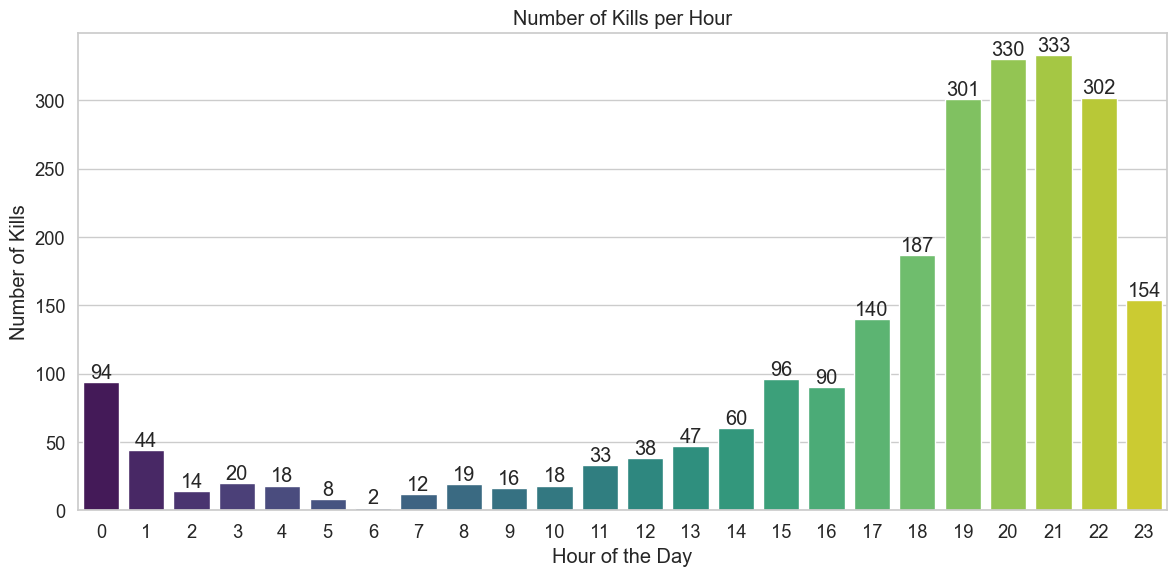

In [12]:
# visualize the time and frequency of kills per hour
plt.figure(figsize=(12, 6))
# Convert the 'time' column to datetime format for easier manipulation
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
# Create a new column for the hour of the kill
df['hour'] = pd.to_datetime(df['time'].astype(str)).dt.hour
# Create a count plot of the number of kills per hour
sns.countplot(data=df, x='hour', palette='viridis')
plt.title('Number of Kills per Hour') 
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Kills')
# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
# top 5 killer with the text "BuZz" in their name
top_5_killers_buzz = df[df['Killer'].str.contains('BuZz', case=False)]['Killer'].value_counts().head(5).reset_index()
top_5_killers_buzz.columns = ['Killer', 'Kill Count']
top_5_killers_buzz.reset_index(drop=True, inplace=True)
top_5_killers_buzz.head(5)

,Killer,Kill Count
0,[BuZz] John Pork,7
1,[BuZz] taubenschreck,4
2,[BuZz] Bratan Joseph,2
3,[BuZz] Luca,1


In [14]:
# list all kills with the text "BuZz" in their name
kills_buzz = df[df['Killer'].str.contains('BuZz', case=False)]
kills_buzz.reset_index(drop=True, inplace=True)
# reorder the columns
kills_buzz = kills_buzz[['Killer', 'Victim', 'Weapon', 'Meter', 'date', 'time']]
kills_buzz.head(50)

,Killer,Victim,Weapon,Meter,date,time
0,[BuZz] John Pork,Apian,RMD,3.07,2025-04-01,20:52:08
1,[BuZz] John Pork,Mango,RMD,4.39,2025-04-03,21:39:31
2,[BuZz] John Pork,Fupp,RMD,21.35,2025-04-03,21:49:08
3,[BuZz] John Pork,Mr.Freeman,RMD,812.79,2025-04-04,18:57:39
4,[BuZz] taubenschreck,Survivor,RMD,213.34,2025-03-31,20:38:57
5,[BuZz] taubenschreck,McLovin,1A-4M,7.06,2025-03-26,22:10:14
6,[BuZz] taubenschreck,DonCorleone,1A-4M,5.26,2025-03-26,22:15:15
7,[BuZz] taubenschreck,V,1A-4M,2.17,2025-03-26,22:15:52
8,[BuZz] John Pork,janithawelp,RMD,12.79,2025-03-23,21:23:23
9,[BuZz] John Pork,terminator_Polska3,RMD,225.47,2025-03-18,20:32:36
